<h1 style="text-align:center;">LAB 5</h1>
<h1 style="text-align:center;">Hough Transform</h1>
<h3 style="text-align:left; color:blue;">Student Name: Sara Hany Mohamed Abdelhady</h3>
<h3 style="text-align:left; color:blue;">Student ID: 2100357</h3>

<h2 style="text-align:left; color:black;">Introduction</h2>

Hough transform is a feature extraction method used in image analysis. Hough transform can be used to isolate features of any regular curve like lines, circles, ellipses, etc. Hough transform in its simplest from can be used to detect straight lines in an image. A generalized Hough transform can be used in applications where simple analytic description of features is not possible. Due to the computational complexity of the algorithm, people generally refrain from using it.

<h2 style="text-align:left; color:black;">Objective</h2>

In this lab, you'll apply two commonly used hough transform operations to detect:
* Lines.
* Circles.

<h2 style="text-align:left; color:black;">Instructions</h2>

In [1]:
# Import the needed libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = [15., 10.]
%matplotlib inline

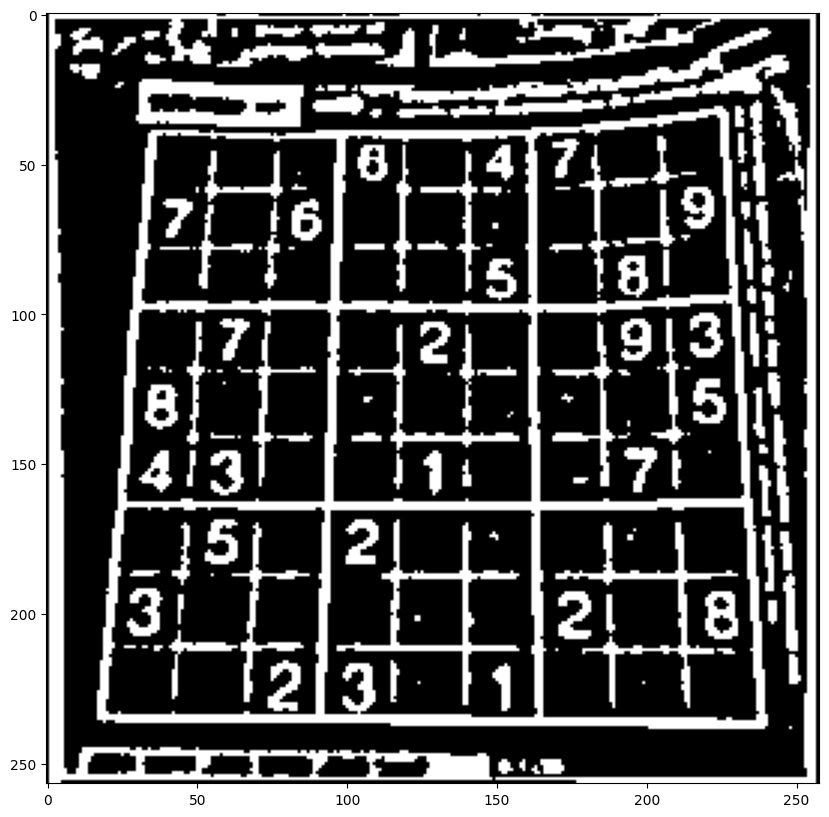

In [10]:
# Read an image from disk
image = cv2.imread(filename="sudoku.PNG", flags=cv2.IMREAD_GRAYSCALE)
# Fifth parameter: Size of neighbourhood used to calculate the threshold
# Sixth parameter: Constant Subtracted of the mean
image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 11, 5)
plt.imshow(image, cmap="gray")

In [3]:
# Apply hough transform algorithm to detect lines in the image
# First parameter is a binary image
# Second and third parameters are ρ and θ accuracies respectively.
# Fourth parameter is the threshold, which means the minimum vote it should get to be considered as a line
lines = cv2.HoughLines(image,rho=1,theta=np.pi/180,threshold=150)
print(lines.shape)

(50, 1, 2)


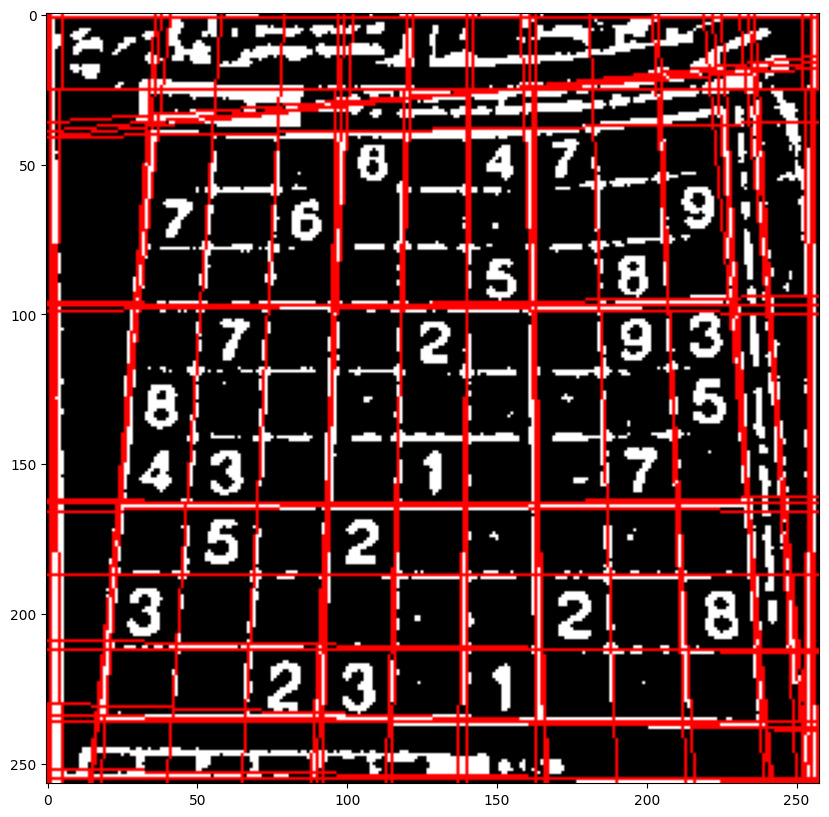

In [4]:
# Loop over the detected lines to draw them in red color
colored_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
for line in lines:
    rho, theta = line[0]
    if np.sin(theta):
        xmin = 0
        xmax = image.shape[1]
        ymin = ((rho - xmin * np.cos(theta)) / np.sin(theta)).astype(np.int16)
        ymax = ((rho - xmax * np.cos(theta)) / np.sin(theta)).astype(np.int16)
    else:
        xmin = xmax = ((rho) / np.cos(theta)).astype(np.int16)
        ymin = 0
        ymax = image.shape[0]
    # Draw the recognized line with thickness = 1 and RGB color = (255, 0, 0)
    cv2.line(colored_image, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(255, 0, 0), thickness=1)
plt.imshow(colored_image)

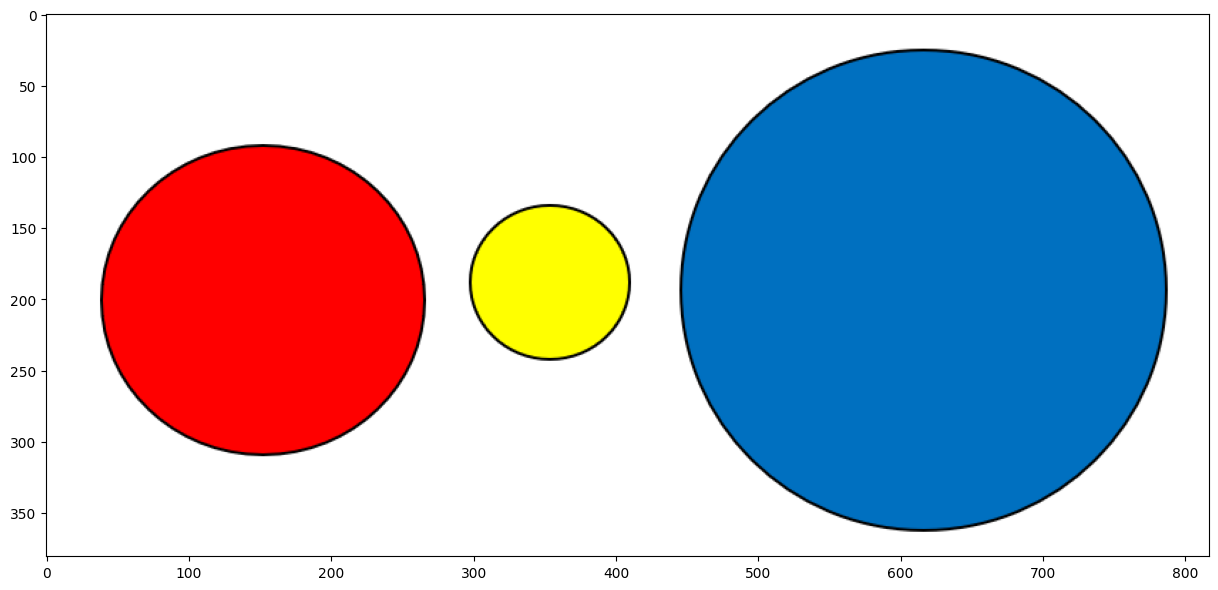

In [5]:
# Read an image from disk
colored_image2 = cv2.imread(filename="circles.png", flags=cv2.IMREAD_COLOR)
image2 = cv2.cvtColor(colored_image2, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(colored_image2, cv2.COLOR_BGR2RGB))

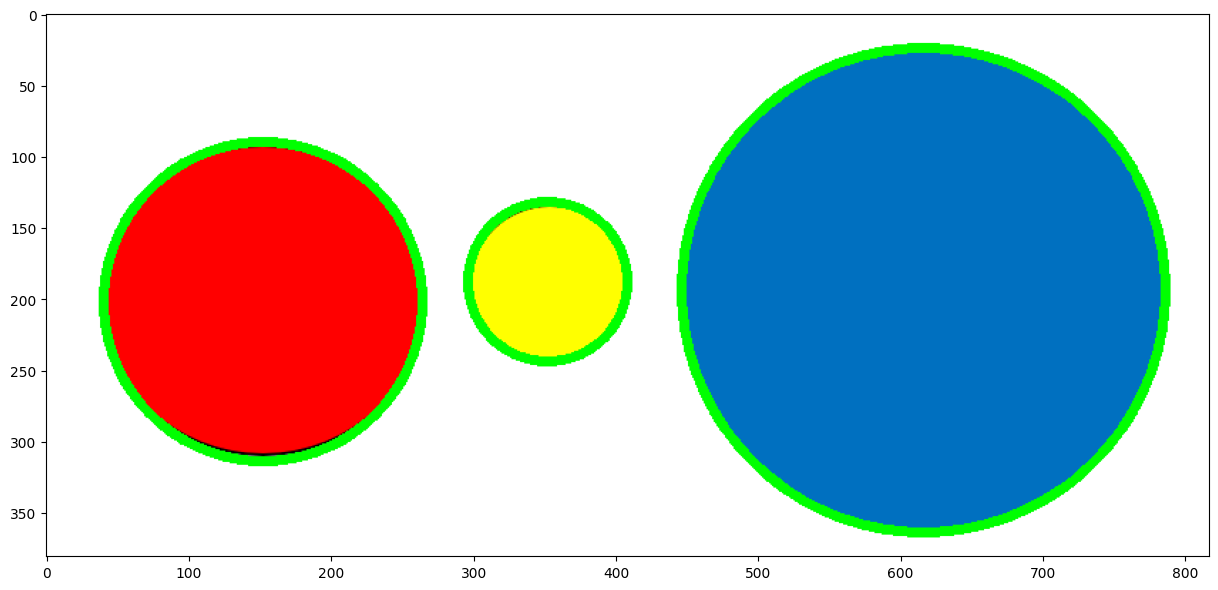

In [11]:
# Apply hough transform algorithm to detect circles in the image
# Hough Gradient mode: Use canny edge detector first on image and vote for theta equals to the gradient direction
# dp: Inverse ratio of the accumulator resolution to the image resolution.
# minDist: Minimum distance between the centers of the detected circles.
# param1: The higher threshold of Canny edge detector
# param2: The accumulator threshold for the circle centers at the detection stage.
# If maxRadius <=0, it is equal to the maximum image dimension
circles = cv2.HoughCircles(image2,method=cv2.HOUGH_GRADIENT,dp=1,minDist=50, param1=150,param2=100,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for circle in circles[0]:
    a, b, r = circle
    cv2.circle(colored_image2, center=(a,b), radius=r, color=(0,255,0), thickness=5)
rgb_image = cv2.cvtColor(colored_image2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)